<a href="https://colab.research.google.com/github/MRazin172/Practice_Exercise/blob/main/2348534_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries that we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#impotrting the dataset as data
data=pd.read_csv('/content/data - data.csv')

In [3]:
print(data.head())
print(data.describe())

              date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 0:00   313000.0         3       1.50         1340      7912   
1  02-05-2014 0:00  2384000.0         5       2.50         3650      9050   
2  02-05-2014 0:00   342000.0         3       2.00         1930     11947   
3  02-05-2014 0:00   420000.0         3       2.25         2000      8030   
4  02-05-2014 0:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip

In [4]:
#no nulls
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

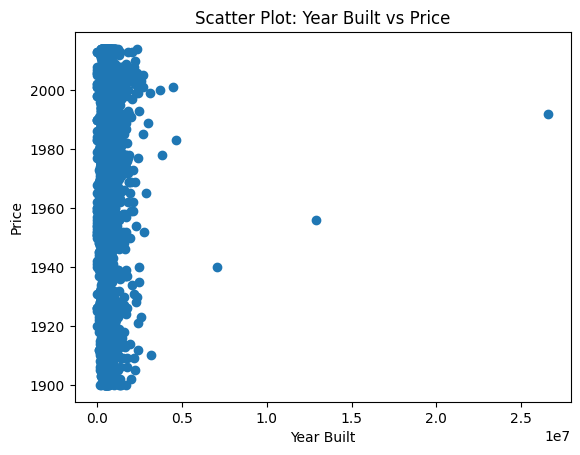

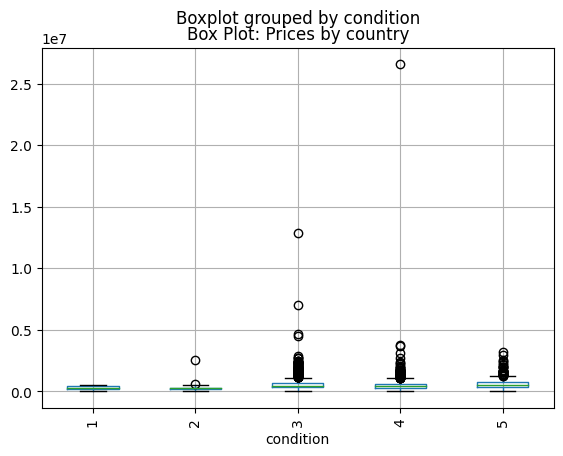

In [5]:
plt.scatter(data['price'], data['yr_built'])
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Scatter Plot: Year Built vs Price')
plt.show()

data.boxplot(column='price', by='condition', rot=90)
plt.title('Box Plot: Prices by country')
plt.show()


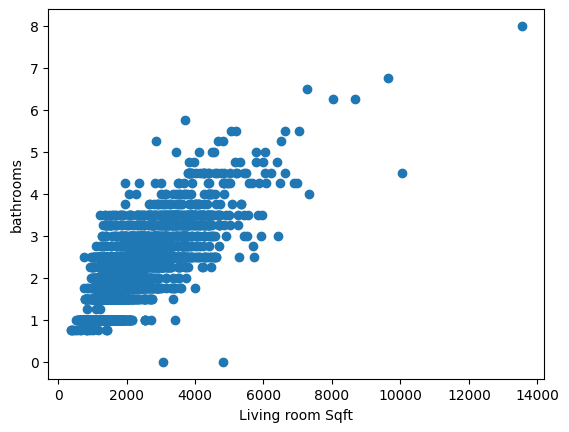

In [6]:
plt.scatter(data['sqft_living'],data['bathrooms'])
plt.xlabel('Living room Sqft')
plt.ylabel('bathrooms')
plt.show()

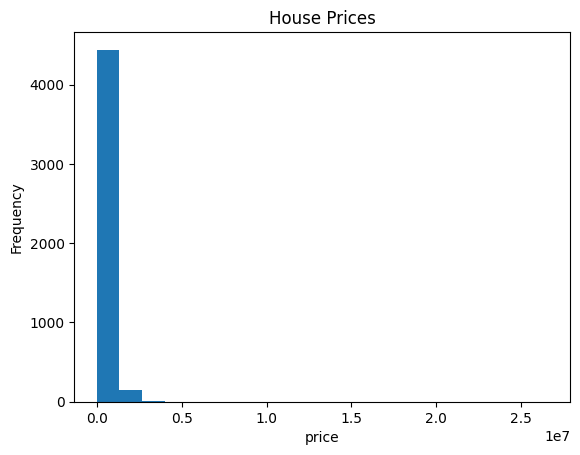

In [7]:
plt.hist(data['price'], bins=20)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('House Prices')
plt.show()

<ipython-input-8-99539a4fe1d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


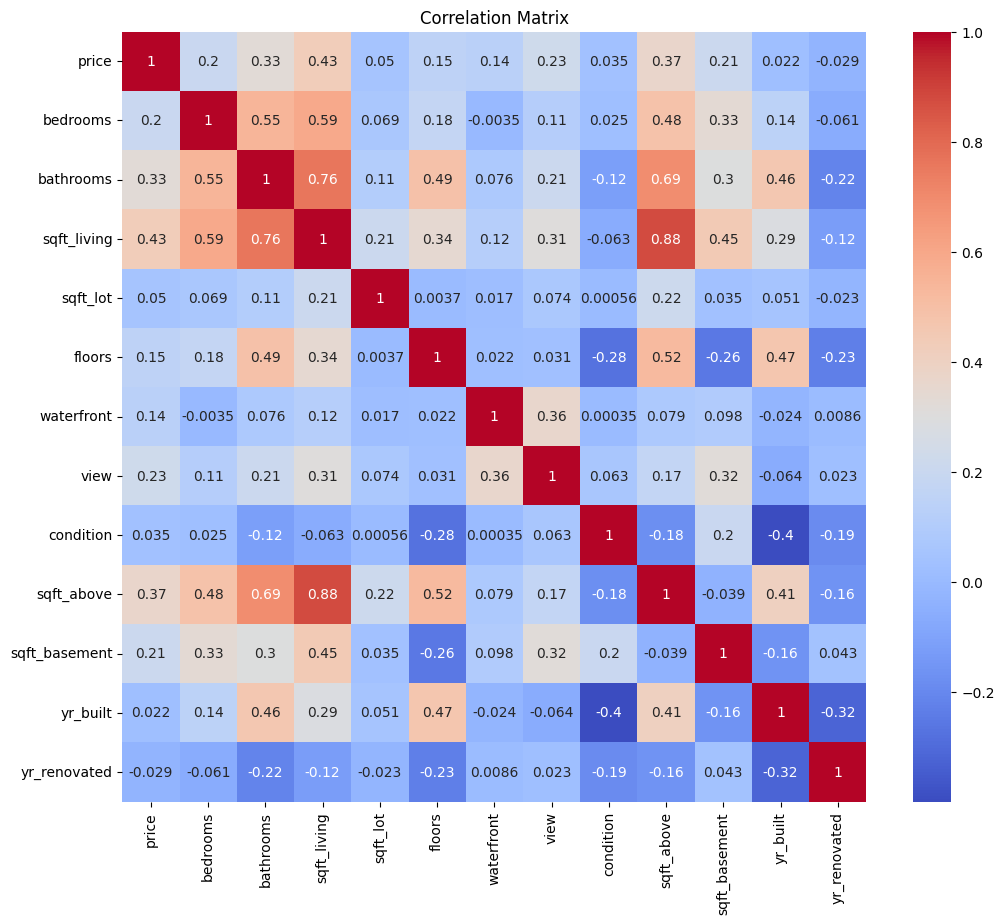

In [8]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [9]:
numberofbins = 5

yrbuilt_bins = np.linspace(data['yr_built'].min(), data['yr_built'].max(), numberofbins + 1)

data['yrbuilt_bins'] = pd.cut(data['yr_built'], bins=yrbuilt_bins, labels=False)
print(data[['yr_built', 'yrbuilt_bins']].head(10))


   yr_built  yrbuilt_bins
0      1955           2.0
1      1921           0.0
2      1966           2.0
3      1963           2.0
4      1976           3.0
5      1938           1.0
6      1976           3.0
7      1989           3.0
8      1985           3.0
9      1945           1.0


In [10]:
num_bins=5
sqft_above_bins = pd.qcut(data['sqft_above'], num_bins, labels=False)
data['Sqft Above Bins'] = sqft_above_bins
print(data[['sqft_above', 'Sqft Above Bins']].head(10))

   sqft_above  Sqft Above Bins
0        1340                1
1        3370                4
2        1930                3
3        1000                0
4        1140                1
5         880                0
6        1350                1
7        2710                4
8        1570                2
9        1520                2


In [11]:
bins=[300,1800,3300,4800,6300,7800,9300,10800]
labels=['300-1800','1800-3300','3300-4800','4800-6300','6300-7800','7800-9300','9300+']
data['Sqft_Above_bins']=pd.cut(data['sqft_above'],bins=bins,labels=labels)

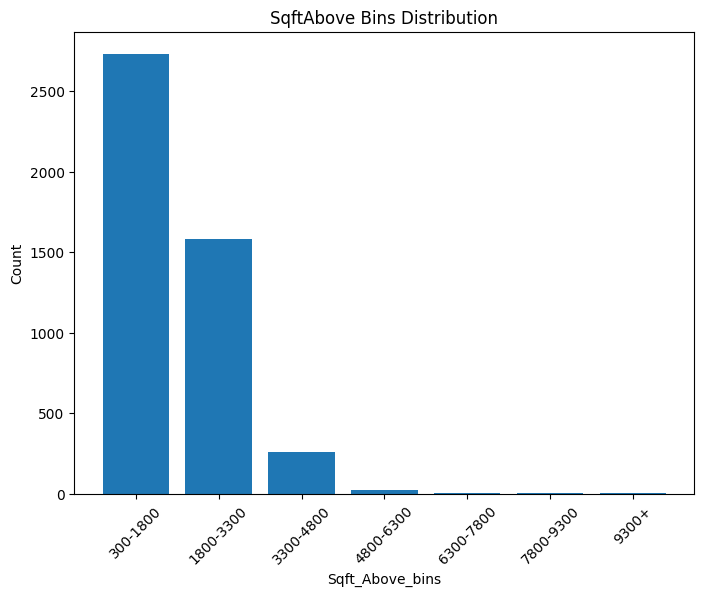

In [12]:
bin_counts = data['Sqft_Above_bins'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Sqft_Above_bins')
plt.ylabel('Count')
plt.title('SqftAbove Bins Distribution')
plt.xticks(rotation=45)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
price = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(price)
normalized_df = pd.DataFrame(data=normalized_data, columns=price.columns)
data[price.columns] = normalized_df

# The data now contains zscore normalized values for price


In [14]:
data.head

<bound method NDFrame.head of                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     02-05-2014 0:00 -0.423864 -0.441122  -0.843204    -0.829971 -0.193434   
1     02-05-2014 0:00  3.249598  1.759705   0.432802     1.568528 -0.161718   
2     02-05-2014 0:00 -0.372424 -0.441122  -0.205201    -0.217367 -0.080978   
3     02-05-2014 0:00 -0.234071 -0.441122   0.113800    -0.144686 -0.190145   
4     02-05-2014 0:00 -0.003482  0.659291   0.432802    -0.206984 -0.121306   
...               ...       ...       ...        ...          ...       ...   
4595  09-07-2014 0:00 -0.432437 -0.441122  -0.524202    -0.653458 -0.236689   
4596  09-07-2014 0:00 -0.031271 -0.441122   0.432802    -0.705374 -0.202882   
4597  09-07-2014 0:00 -0.239562 -0.441122   0.432802     0.904009 -0.218462   
4598  10-07-2014 0:00 -0.618268  0.659291  -0.205201    -0.051238 -0.229164   
4599  10-07-2014 0:00 -0.587759 -0.441122   0.432802    -0.674224 -0.188139   

        floors  water

In [15]:
sqft_above = data.select_dtypes(include=[np.number])
mean = sqft_above.mean()
std = sqft_above.std()
normalized_data = (sqft_above - mean) / std
data[sqft_above.columns] = normalized_data

In [16]:
normalized_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,yrbuilt_bins,Sqft Above Bins
0,-0.423817,-0.441074,-0.843112,-0.829881,-0.193413,-0.022414,-0.084995,-0.309161,-0.667040,-0.565162,-0.672391,-0.530956,1.221538,-0.464960,-0.703460
1,3.249245,1.759513,0.432754,1.568358,-0.161700,0.906456,-0.084995,4.829554,2.286168,1.789365,-0.069121,-1.674511,-0.825604,-2.069021,1.419380
2,-0.372384,-0.441074,-0.205179,-0.217344,-0.080969,-0.951284,-0.084995,-0.309161,0.809564,0.119158,-0.672391,-0.160982,-0.825604,-0.464960,0.711766
3,-0.234046,-0.441074,0.113788,-0.144670,-0.190125,-0.951284,-0.084995,-0.309161,0.809564,-0.959517,1.482145,-0.261884,-0.825604,-0.464960,-1.411073
4,-0.003481,0.659220,0.432754,-0.206962,-0.121293,-0.951284,-0.084995,-0.309161,0.809564,-0.797135,1.051238,0.175357,1.208264,0.337070,-0.703460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.432390,-0.441074,-0.524145,-0.653387,-0.236663,-0.951284,-0.084995,-0.309161,0.809564,-0.367985,-0.672391,-0.564590,1.194991,-0.464960,0.004153
4596,-0.031267,-0.441074,0.432754,-0.705297,-0.202860,0.906456,-0.084995,-0.309161,-0.667040,-0.425978,-0.672391,0.410795,1.225622,0.337070,0.004153
4597,-0.239536,-0.441074,0.432754,0.903911,-0.218438,0.906456,-0.084995,-0.309161,-0.667040,1.371813,-0.672391,1.285278,-0.825604,1.139100,1.419380
4598,-0.618201,0.659220,-0.205179,-0.051232,-0.229139,-0.951284,-0.084995,-0.309161,-0.667040,-0.878326,1.525235,0.108089,-0.825604,0.337070,-1.411073


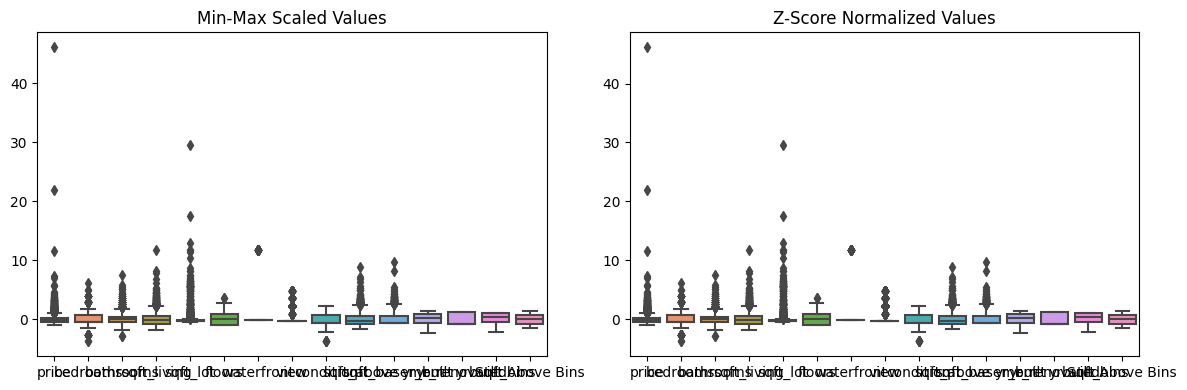

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(data=normalized_data, ax=axes[0])
axes[0].set_title("Min-Max Scaled Values")
sns.boxplot(data=sqft_above, ax=axes[1])
axes[1].set_title("Z-Score Normalized Values")
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = data.drop('target_column', axis=1)
y = data['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KeyError: ignored